In [1]:
#1. sam파일 -> {'gene id':counts,'gene id':counts, ..}

from collections import Counter, defaultdict 
import os 
from itertools import islice

In [2]:
def count_per_gene(filename):
    
    with open(f'/home/qbio1/shjoo06/p/project1/alignment_data/{filename}','rt') as inpfile: 
        genenames_edited = dict()   #key: qname, value: gene name 
        genes_per_read = defaultdict(set)
        
        for line in inpfile: 
            if line.startswith('@'):   #header 제거
                continue 
            columns_to_list = line.split()
            if int(columns_to_list[1]) & 4 == 4:      #flag 4포함 제거 
                continue
                
            qname = columns_to_list[0]
            rname_list = columns_to_list[2].split('|')
            rname_list = list(map(str,rname_list))
            
            genes_per_read[qname].add(rname_list[1])  #key: qname, value: gene id 목록의 set 
        
        for i in genes_per_read.keys():
            if len(genes_per_read[i])==1:
                genenames_edited[i] = ''.join(genes_per_read[i]) 
                       
    genes_list = []
    for i in genenames_edited.keys():
        genes_list.append(genenames_edited[i])         
            
    return Counter(genes_list)       

In [3]:
samfiles = [
    'CLIP_Aligned.out.sam',
    'RNAseq_siLin28a_Aligned.out.sam',
    'RNAseq_siLuc_Aligned.out.sam',
    'RNAseq_unt_Aligned.out.sam',
    'RPFsiLin28a_Aligned.out.sam',
    'RPFsiLuc_Aligned.out.sam'
]    

for i in samfiles:
    globals()["count_dict_{}".format(i[:-16])] = count_per_gene(i)
                            
print(list(islice(count_dict_CLIP.items(),5)))

[('ENSMUSG00000119584.1', 2613335), ('ENSMUSG00000026234.13', 53126), ('ENSMUSG00000032309.16', 1266), ('ENSMUSG00000028617.11', 469), ('ENSMUSG00000109564.2', 76)]


In [4]:
#2. scatter plot 그리기 

In [16]:
#pandas dataframe 만들기 
import pandas as pd

all_counts_dict = dict()
all_counts_dict['CLIP-35L33G'] = count_dict_CLIP
all_counts_dict['RNAseq_siLin28a'] = count_dict_RNAseq_siLin28a
all_counts_dict['RNAseq_siLuc'] = count_dict_RNAseq_siLuc
all_counts_dict['RNAseq_unt'] = count_dict_RNAseq_unt
all_counts_dict['RPFsiLin28a'] = count_dict_RPFsiLin28a
all_counts_dict['RPFsiLuc'] = count_dict_RPFsiLuc

In [18]:
df_rawcounts = pd.DataFrame(all_counts_dict)
df_rawcounts

,CLIP-35L33G,RNAseq_siLin28a,RNAseq_siLuc,RNAseq_unt,RPFsiLin28a,RPFsiLuc
ENSMUSG00000119584.1,2613335.0,229007.0,258118.0,375707.0,5926047.0,6253431.0
ENSMUSG00000026234.13,53126.0,32239.0,39970.0,37017.0,3995.0,10451.0
ENSMUSG00000032309.16,1266.0,1458.0,1292.0,1319.0,398.0,586.0
ENSMUSG00000028617.11,469.0,649.0,514.0,765.0,165.0,347.0
ENSMUSG00000109564.2,76.0,NaN,NaN,NaN,5.0,6.0
...,...,...,...,...,...,...
ENSMUSG00000029307.8,NaN,NaN,NaN,NaN,NaN,1.0
ENSMUSG00000100261.2,NaN,NaN,NaN,NaN,NaN,1.0
ENSMUSG00002076138.1,NaN,NaN,NaN,NaN,NaN,1.0
ENSMUSG00000067599.14,NaN,NaN,NaN,NaN,NaN,1.0


In [19]:
df_dropnan = df_rawcounts.dropna(axis=0)
df_dropnan

,CLIP-35L33G,RNAseq_siLin28a,RNAseq_siLuc,RNAseq_unt,RPFsiLin28a,RPFsiLuc
ENSMUSG00000119584.1,2613335.0,229007.0,258118.0,375707.0,5926047.0,6253431.0
ENSMUSG00000026234.13,53126.0,32239.0,39970.0,37017.0,3995.0,10451.0
ENSMUSG00000032309.16,1266.0,1458.0,1292.0,1319.0,398.0,586.0
ENSMUSG00000028617.11,469.0,649.0,514.0,765.0,165.0,347.0
ENSMUSG00000022462.8,26359.0,5506.0,5507.0,7936.0,10012.0,10003.0
...,...,...,...,...,...,...
ENSMUSG00000117358.2,1.0,17.0,26.0,33.0,15.0,7.0
ENSMUSG00000086049.2,1.0,4.0,5.0,1.0,2.0,2.0
ENSMUSG00000036923.13,1.0,8.0,7.0,12.0,4.0,2.0
ENSMUSG00000112727.2,1.0,6.0,3.0,15.0,4.0,1.0


In [63]:
#RPF_cutoff = 80
#RNAseq_cutoff = 30 

df_filtered = df_dropnan[(df_dropnan['RPFsiLin28a'] >= 80) & (df_dropnan['RNAseq_unt'] >= 30)\
              & (df_dropnan['RNAseq_siLuc'] >= 30) & (df_dropnan['RNAseq_siLin28a'] >= 30)]                           
df_filtered

,CLIP-35L33G,RNAseq_siLin28a,RNAseq_siLuc,RNAseq_unt,RPFsiLin28a,RPFsiLuc
ENSMUSG00000119584.1,2613335.0,229007.0,258118.0,375707.0,5926047.0,6253431.0
ENSMUSG00000026234.13,53126.0,32239.0,39970.0,37017.0,3995.0,10451.0
ENSMUSG00000032309.16,1266.0,1458.0,1292.0,1319.0,398.0,586.0
ENSMUSG00000028617.11,469.0,649.0,514.0,765.0,165.0,347.0
ENSMUSG00000022462.8,26359.0,5506.0,5507.0,7936.0,10012.0,10003.0
...,...,...,...,...,...,...
ENSMUSG00000025470.12,31.0,203.0,115.0,185.0,117.0,149.0
ENSMUSG00000068220.7,23.0,236.0,159.0,148.0,520.0,389.0
ENSMUSG00000047281.4,11.0,385.0,150.0,256.0,129.0,155.0
ENSMUSG00000024446.14,9.0,199.0,103.0,185.0,364.0,356.0


In [30]:
import math
def pseudolog2(x):
    return math.log2(x+0.01)

#x좌표
CLIP_enrichment = df_filtered['CLIP-35L33G'].apply(pseudolog2).sub(df_filtered['RNAseq_unt'].apply(pseudolog2))

#y좌표 
siLuc_Rdensity = df_filtered['RPFsiLuc'].apply(pseudolog2).sub(df_filtered['RNAseq_siLuc'].apply(pseudolog2))
siLin28a_Rdensity = df_filtered['RPFsiLin28a'].apply(pseudolog2).sub(df_filtered['RNAseq_siLin28a'].apply(pseudolog2))
Rdensity_change = siLin28a_Rdensity.sub(siLuc_Rdensity)

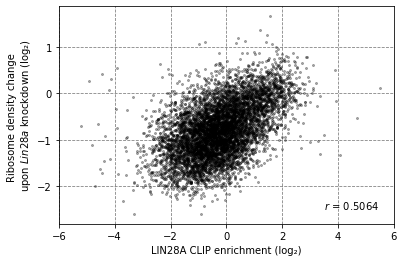

In [62]:
from scipy import stats
import matplotlib.pyplot as plt

plt.scatter(CLIP_enrichment,Rdensity_change, s=2**2, c='#000000', alpha=0.3)
plt.grid(True, color='#000000', alpha=0.5, linestyle='--')
plt.xlim(-6,6)
plt.xlabel('LIN28A CLIP enrichment (log\u2082)')
plt.ylabel('Ribosome density change \nupon $Lin28a$ knockdown (log\u2082)')

corr_co = round(stats.pearsonr(CLIP_enrichment, Rdensity_change)[0], 4)
plt.text(3.5, -2.5, f'$r$ = {corr_co}')

plt.savefig('./fig4D.png',facecolor='#FFFFFF')
plt.show()